## Import Statements


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data_df = pd.read_csv("Ecommerce Customers.csv")
data_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Exploratory Operations


In [5]:
data_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
# TODO: Making the pair plot

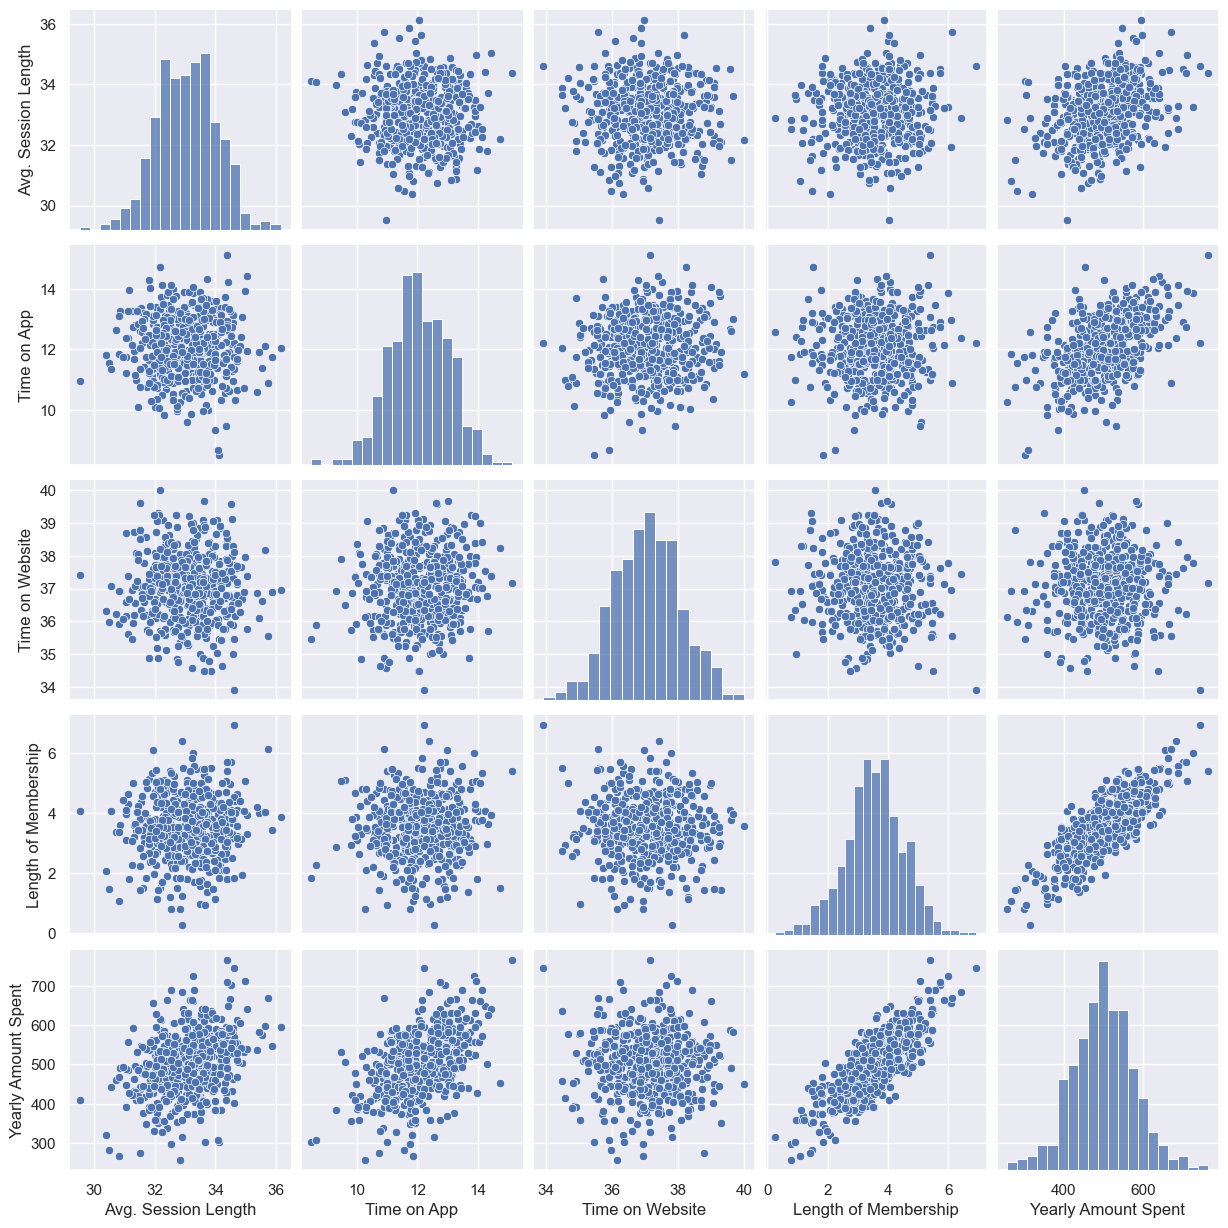

In [13]:
sns.set_theme("notebook")
sns.pairplot(data=data_df)

<Figure size 640x480 with 0 Axes>

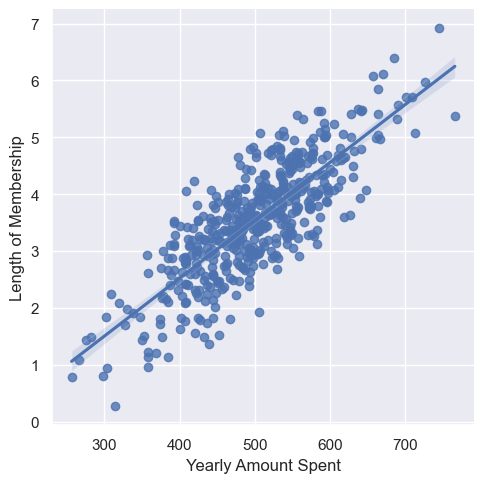

In [19]:
plt.figure()
sns.lmplot(
    data=data_df,
    x="Yearly Amount Spent",
    y="Length of Membership",
)

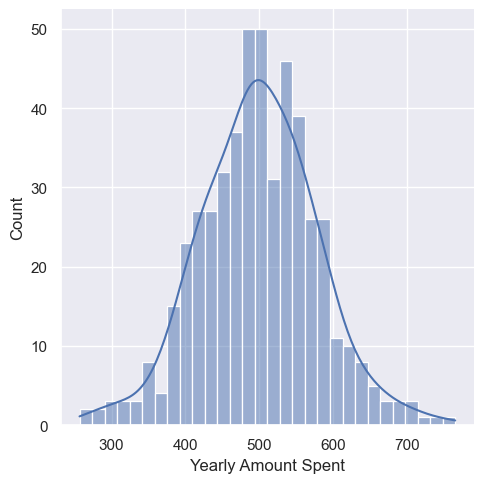

In [48]:
sns.displot(
    data=data_df,
    x="Yearly Amount Spent",
    kde=True,
    bins=30,
)

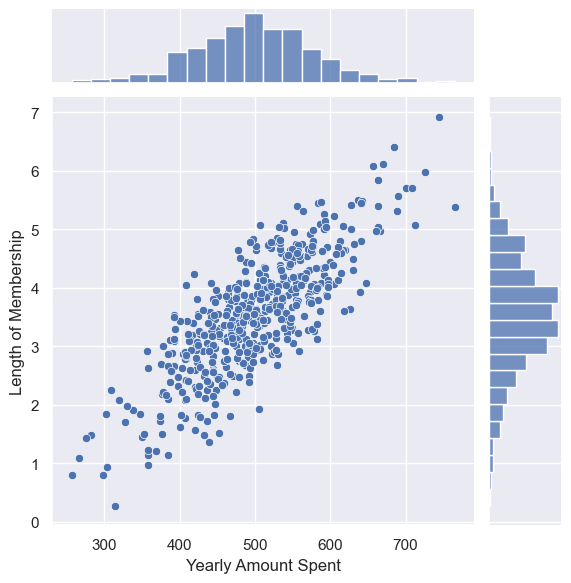

In [32]:
sns.jointplot(
    data=data_df,
    x="Yearly Amount Spent",
    y="Length of Membership",
)

<Axes: >

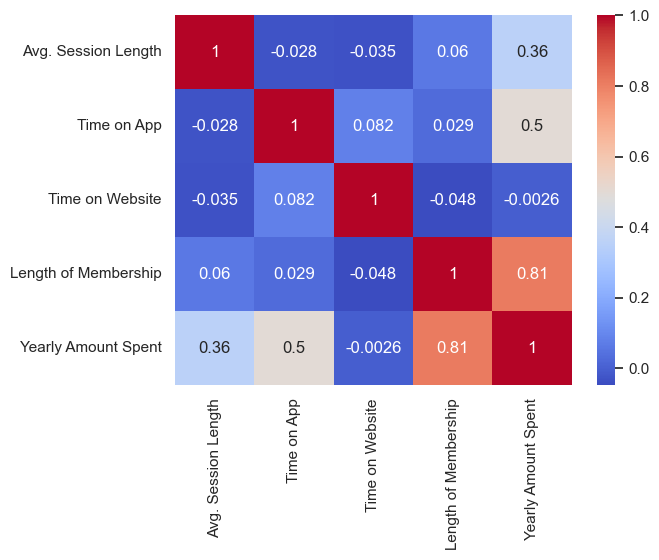

In [36]:
df_numeric = data_df.select_dtypes(include=[int, float])
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    cmap="coolwarm",
)

### Model Training


In [39]:
Features = data_df[
    [
        "Avg. Session Length",
        "Time on App",
        "Time on Website",
        "Length of Membership",
    ]
]

Target = data_df["Yearly Amount Spent"]

#### Splitting the Data Set


In [40]:
X_Train, x_test, Y_Train, y_test = train_test_split(
    Features,
    Target,
    test_size=0.3,
    random_state=101,
)

#### Fitting the Model


In [41]:
lr = LinearRegression()
lr.fit(X_Train, Y_Train)

LinearRegression()

#### **Intercept\_**


In [42]:
lr.intercept_

-1047.9327822502391

#### **coeff\_**


In [43]:
lr.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [47]:
coeff = pd.DataFrame(lr.coef_, Features.columns)
coeff.columns = ["Coeffient"]

coeff

,Coeffient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### **Making Predictions**


In [50]:
predictions = lr.predict(x_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

### Compariing the Predictions to actual answer using the histplot


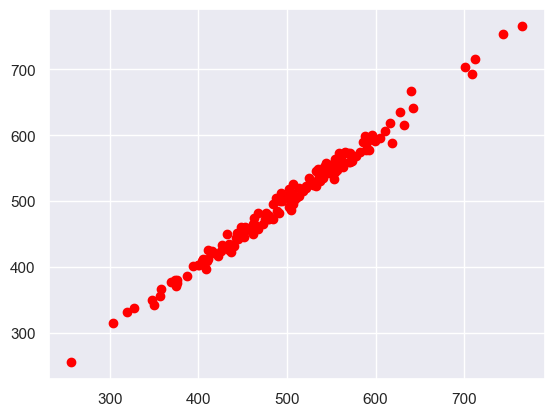

In [56]:
plt.scatter(
    x=y_test,
    y=predictions,
    c="red",
)

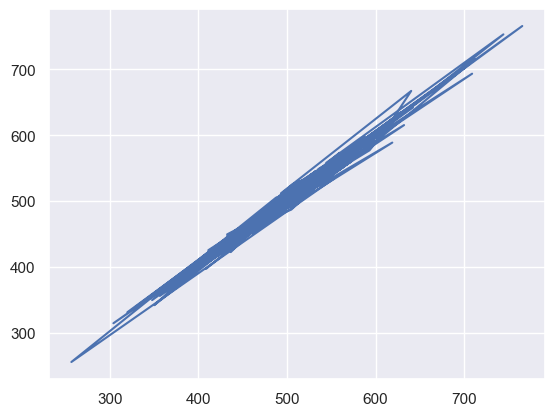